# Testing of Controllers approximated using the Tustin Approximation

This notebook instantiates the discretised controllers used for the Gym environment and performs various step responses in order to verify controller approximations.

In [8]:
# Set matplotlib to inline mode and import necessary components
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import numpy as np

import sys
sys.path.append("/catkin_ws/src/jointcontrol/scripts")
from controllers import *

## T1 Block open Loop Step Response

Open loop step response from 0 to 1 with *kp=1* and *t1=5*.

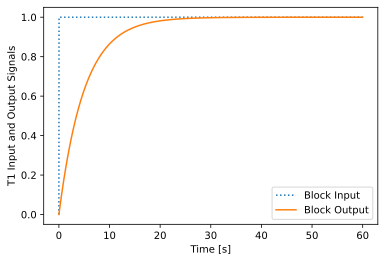

In [2]:
# Set simulation time and discretisation
simTime = 60
ts = 1/100
samples = int(simTime*(1/ts))
# Set up time and input signals
time = [ i*ts for i in range(samples) ]
inSignal = [0] + [ 1 for _ in range(samples-1) ]
# Calculate output signal
block = PT1Block(kp=1, T1=5, ts=ts)
result = [ block.update(s) for s in inSignal ]
# Plot everything
plt.plot(time, inSignal, label="Block Input", linestyle=":")
plt.plot(time, result, label="Block Output")
plt.xlabel("Time [s]")
plt.ylabel("T1 Input and Output Signals")
plt.legend()
plt.show()

## D-Block open Loop Step Response

Open loop step response from 0 to 1 with *kd=1*. A T1 block wih *t1=1* is put in series with the D block in order to make the d block implementable in practice.

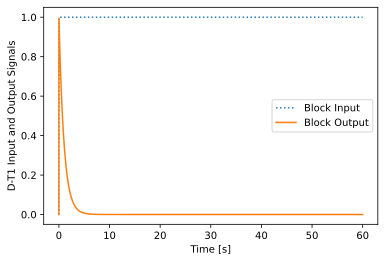

In [3]:
# Set simulation time and discretisation
simTime = 60
ts = 1/100
samples = int(simTime*(1/ts))
# Set up time and input signals
time = [ i*ts for i in range(samples) ]
inSignal = [0] + [ 1 for _ in range(samples-1) ]
# Calculate output signal
block = DBlock(kd=1, ts=ts)
t1 = PT1Block(kp=1, T1=1, ts=ts)
result = [ t1.update(block.update(s)) for s in inSignal ]
# Plot everything
plt.plot(time, inSignal, label="Block Input", linestyle=":")
plt.plot(time, result, label="Block Output")
plt.xlabel("Time [s]")
plt.ylabel("D-T1 Input and Output Signals")
plt.legend()
plt.show()

## PT2 open Loop Step Response

Open loop step response from 0 to 1 with *kp=1* *T=1* and *D=1* as well as *D=0.2*.

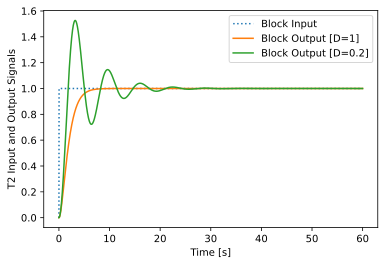

In [4]:
# Set simulation time and discretisation
simTime = 60
ts = 1/100
samples = int(simTime*(1/ts))
# Set up time and input signals
time = [ i*ts for i in range(samples) ]
inSignal = [0] + [ 1 for _ in range(samples-1) ]
plt.plot(time, inSignal, label="Block Input", linestyle=":")
# Plot D=1
block = PT2Block(T=1, D=1, kp=1, ts=ts)
result = [ block.update(s) for s in inSignal ]
plt.plot(time, result, label="Block Output [D=1]")
# Plot D=0.2
block = PT2Block(T=1, D=0.2, kp=1, ts=ts)
result = [ block.update(s) for s in inSignal ]
plt.plot(time, result, label="Block Output [D=0.2]")
# Finish Plot
plt.xlabel("Time [s]")
plt.ylabel("T2 Input and Output Signals")
plt.legend()
plt.show()

## PID closed Loop Step Response

Closed loop step response from 0 to 1 with *kp=1*, *ki=1*, *kd=1*. A T1 block wih *t1=5* is put in series with the PID block in order to make it implementable in practice.

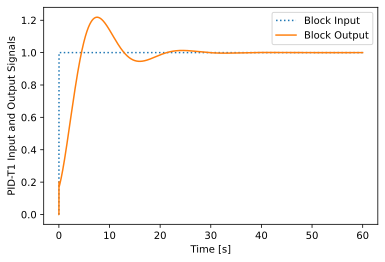

In [5]:
# Set simulation time and discretisation
simTime = 60
ts = 1/100
samples = int(simTime*(1/ts))
# Set up time and input signals
time = [ i*ts for i in range(samples) ]
inSignal = [0] + [ 1 for _ in range(samples-1) ]
# Calculate output signal
block = PIDController(kp=1, ki=1, kd=1, ts=ts)
t1 = PT1Block(kp=1, T1=5, ts=ts)
result = []
feedback = 0
for s in inSignal:
    result.append(feedback)
    feedback = t1.update(block.update(s-feedback))
# Plot everything
plt.plot(time, inSignal, label="Block Input", linestyle=":")
plt.plot(time, result, label="Block Output")
plt.xlabel("Time [s]")
plt.ylabel("PID-T1 Input and Output Signals")
plt.legend()
plt.show()

## Strategy 4 Controller open Loop Step Response

Open loop step response from 0 to 1 with [Hebi Strategy 4](https://docs.hebi.us/core_concepts.html#control-strategies) parameters set to the [default parameters](https://docs.hebi.us/resources/gains/X5-4_STRATEGY4.xml) provided for the modelled actuator *[30, 0, 0, 0.05, 0, 0, 0.25, 0, 0.001]* (values are PID for position, velocity and effort PID controllers). The output is smoothed using a PT2 block with parameters *kp=0.1*, *T=0.5* and *D=1* in order to mimick behaviour of the actuator's mechanical components.

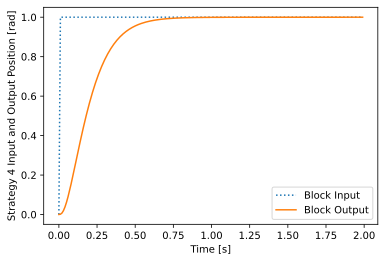

In [6]:
# Set simulation time and discretisation
simTime = 2
ts = 1/100
samples = int(simTime*(1/ts))
# Set up time, input and feedback signals
time = [ i*ts for i in range(samples) ]
inSignal = [[0, 0, 0]] + [ [1, 1, 1] for _ in range(samples-1) ]
feedback = [ [0, 0, 0] for _ in range(samples) ]
# Calculate output signal
block = strategy4Controller(
    ts=ts,
    constants = [30, 0, 0, 0.05, 0, 0, 0.25, 0, 0.001]
)
PT2 = PT2Block(T=0.1, D=1, kp=0.5, ts=ts)
result = [ PT2.update(block.update(s, f)) for s, f in zip(inSignal, feedback) ]
# Plot everything
plt.plot(time, np.array(inSignal)[:,0], label="Block Input", linestyle=":")
plt.plot(time, result, label="Block Output")
plt.xlabel("Time [s]")
plt.ylabel("Strategy 4 Input and Output Position [rad]")
plt.legend()
plt.show()

<center>____________________________________________________________________________________________________________________________</center>
<center><a href="../documentation.html">Main Page</a></center>